In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats as stats

# Scraping HTML and Building DataFrame

In [2]:
year = 2021

In [3]:
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
html = urlopen(url)
soup = BeautifulSoup(html)

In [4]:
soup.findAll('tr',limit=2)

[<tr>
 <th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
 <th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
 <th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
 <th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
 <th aria-label="Team" class="poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>
 <th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
 <th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
 <th aria-label="Minutes Played Per Game" class="poptip hide_non_quals center" data-stat="mp_per_g"

In [5]:
headers = []
for head in soup.findAll('tr',limit=2)[0].findAll('th'):
    headers.append(head.getText())

In [6]:
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [7]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

In [8]:
stat = pd.DataFrame(player_stats, columns = headers)
stat

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,...,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
727,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,...,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
728,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,...,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
729,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,...,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


# Cleaning and Normalizing

In [9]:
stat.isnull().sum()

Player    26
Pos       26
Age       26
Tm        26
G         26
GS        26
MP        26
FG        26
FGA       26
FG%       26
3P        26
3PA       26
3P%       26
2P        26
2PA       26
2P%       26
eFG%      26
FT        26
FTA       26
FT%       26
ORB       26
DRB       26
TRB       26
AST       26
STL       26
BLK       26
TOV       26
PF        26
PTS       26
dtype: int64

In [10]:
stat = stat.dropna()

In [11]:
#stat = stat.drop(['Age'],axis=0)

In [12]:
x = stat.drop(['Player','Pos','Tm','FG','FGA','3P','3PA','2P','2PA','FT','FTA','PTS'],axis=1)
y = stat.loc[:,['PTS']]

In [13]:
x = x.apply(pd.to_numeric).fillna(0)
y = y.apply(pd.to_numeric).fillna(0)

In [14]:
def norm(x):
    mu = np.mean(x, axis = 0)  
    sigma = np.std(x, axis= 0)
    x_norm = (x - mu)/sigma
    return x_norm, mu, sigma

In [15]:
x_norm, mu, sigma = norm(x.values)

In [16]:
m = len(y)
m

705

# Splitting Data and Building Model

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y,test_size=0.3)

In [18]:
regressor2 = LinearRegression()
regressor2.fit(x_train,y_train)

LinearRegression()

In [19]:
y_prediction2 = regressor2.predict(x_test)

In [20]:
y_test.describe()

,PTS
count,212.000000
mean,7.804717
std,5.975295
min,0.100000
25%,3.350000
50%,6.550000
75%,10.125000
max,28.500000


In [21]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction2))
print(RMSE)

2.2756857904302774


In [22]:
pts_prediction = pd.DataFrame(y_prediction2)

In [23]:
pts_prediction.columns = ['PTS']

In [24]:
pts_prediction.describe()

,PTS
count,212.000000
mean,7.912728
std,5.786379
min,-3.256311
25%,3.528595
50%,7.079613
75%,11.852262
max,23.546215


In [25]:
pts_prediction = pts_prediction.set_index(y_test.index)

In [26]:
def percent_error(predicted, actual):
    perc_error = ((predicted-actual)/actual)*100
    print(round(perc_error,4))

In [27]:
predicted_mean = pts_prediction.describe().iloc[1]
predicted_mean

PTS    7.912728
Name: mean, dtype: float64

In [28]:
population_mean = y.describe().iloc[1]
population_mean

PTS    8.616596
Name: mean, dtype: float64

In [29]:
y_test_mean = y_test.describe().iloc[1]
y_test_mean[0]

7.804716981132075

In [30]:
percent_error(predicted_mean,y_test_mean)

PTS    1.3839
Name: mean, dtype: float64


In [31]:
percent_error(predicted_mean,population_mean)

PTS   -8.1688
Name: mean, dtype: float64


In [32]:
y_test_array = y_test.to_numpy()
y_test_array[:5]

array([[ 5.1],
       [ 7.7],
       [20.3],
       [ 0.8],
       [20.4]])

In [33]:
pts_prediction_array = pts_prediction.to_numpy()
pts_prediction_array[:5]

array([[ 5.60923969],
       [11.89656208],
       [22.77810195],
       [ 0.35435045],
       [19.52031881]])

0.9254398990978354

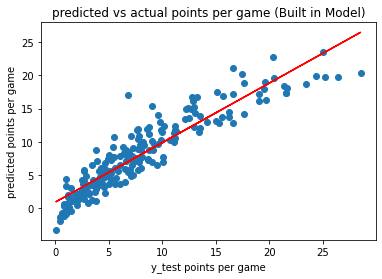

In [34]:
plt.scatter(y_test['PTS'],pts_prediction['PTS'])
plt.xlabel('y_test points per game')
plt.ylabel('predicted points per game')
plt.title('predicted vs actual points per game (Built in Model)')

z = np.polyfit(y_test['PTS'], pts_prediction['PTS'], 1)
p = np.poly1d(z)
plt.plot(y_test['PTS'],p(y_test['PTS']),"r")

stats.pearsonr(y_test_array.flatten(),pts_prediction_array.flatten())[0]

# Manual Linear Regression Implementation

In [35]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [36]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_history.append(compute_cost(X, y, theta)) 
    return theta, cost_history

In [37]:
x_norm = np.hstack((np.ones((m,1)), x_norm))
x_test = np.hstack((np.ones((len(x_test),1)), x_test))

In [38]:
theta = np.zeros(x_norm.shape[1])
iterations = 100
alpha = 0.15

In [39]:
theta = theta[:,np.newaxis]

In [40]:
theta, cost_history = gradient_descent(x_norm, y.values, theta, alpha, iterations)

In [41]:
cost_history[:5]

[31.906097938389475,
 23.803028713328732,
 18.113042679893425,
 14.047531209833847,
 11.119948905152079]

Text(0.5, 1.0, 'Convergence of gradient descent')

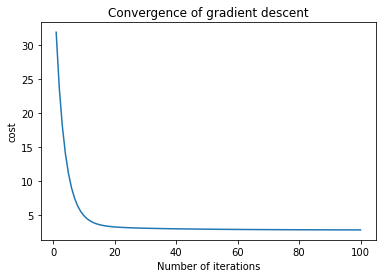

In [42]:
plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.title("Convergence of gradient descent")

In [43]:
def predict(X, theta):
    return X.dot(theta)
y_pred = predict(x_test, theta)

0.9305212804499309

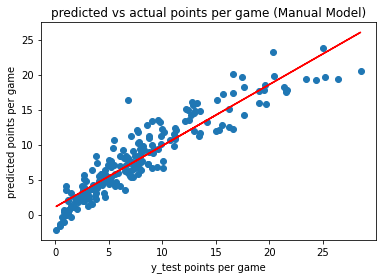

In [44]:
plt.scatter(y_test['PTS'],y_pred.flatten())
plt.xlabel('y_test points per game')
plt.ylabel('predicted points per game')
plt.title('predicted vs actual points per game (Manual Model)')

z = np.polyfit(y_test['PTS'], y_pred.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test['PTS'],p(y_test['PTS']),"r")

stats.pearsonr(y_test_array.flatten(),y_pred.flatten())[0]

0.9254398990978354

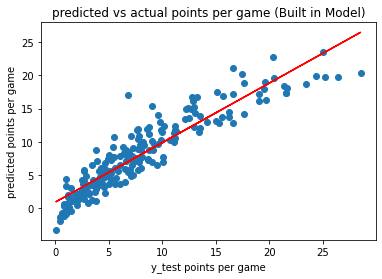

In [45]:
plt.scatter(y_test['PTS'],pts_prediction['PTS'])
plt.xlabel('y_test points per game')
plt.ylabel('predicted points per game')
plt.title('predicted vs actual points per game (Built in Model)')

z = np.polyfit(y_test['PTS'], pts_prediction['PTS'], 1)
p = np.poly1d(z)
plt.plot(y_test['PTS'],p(y_test['PTS']),"r")

stats.pearsonr(y_test_array.flatten(),pts_prediction_array.flatten())[0]

In [46]:
percent_error(stats.pearsonr(y_test_array.flatten(),pts_prediction_array.flatten())[0],stats.pearsonr(y_test_array.flatten(),y_pred.flatten())[0])

-0.5461


In [47]:
RMSE2 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE2)

2.1867894304256095


In [48]:
percent_error(RMSE2,RMSE)

-3.9064
